# Lab: Linear Regression
Author: Lucas Iuri

## Importing Packages

### New Imports

We begin, as usual, by importing the libraries and functions we will use.

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

# New imports to this lab
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

# Specific from the package associated with the reference book
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

### Inspecting Objects and Namespace

We used the structure `from X import Y` so that we can call the function `Y` directly, without needing to acces it as a submodule of `X`. We can check the callable objects, also called namespace, using the function `dir()`.

In [3]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abline',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

Common `Python` functions like `print()` are inside the objects like `__builtins__`.
Any object has its own namespace.

In [4]:
A = np.array([[1,2,3],[4,5,6]])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [5]:
A

array([[1, 2, 3],
       [4, 5, 6]])

We can now call any funtion of its namespace. Or check the function signature and purpose using `?`.

In [6]:
A.transpose?

Docstring:
a.transpose(*axes)

Returns a view of the array with axes transposed.

Refer to `numpy.transpose` for full documentation.

Parameters
----------
axes : None, tuple of ints, or `n` ints

 * None or no argument: reverses the order of the axes.

 * tuple of ints: `i` in the `j`-th place in the tuple means that the
   array's `i`-th axis becomes the transposed array's `j`-th axis.

 * `n` ints: same as an n-tuple of the same ints (this form is
   intended simply as a "convenience" alternative to the tuple form).

Returns
-------
p : ndarray
    View of the array with its axes suitably permuted.

See Also
--------
transpose : Equivalent function.
ndarray.T : Array property returning the array transposed.
ndarray.reshape : Give a new shape to an array without changing its data.

Examples
--------
>>> import numpy as np
>>> a = np.array([[1, 2], [3, 4]])
>>> a
array([[1, 2],
       [3, 4]])
>>> a.transpose()
array([[1, 3],
       [2, 4]])
>>> a.transpose((1, 0))
array([[1, 3],
    

In [7]:
A.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

## Simple Linear Regression

In this chapter is introduced some functions from the package created for the reference book named `ISLP`. It has a convenient function to load data so that we do not have to download and save the files provided by the authors. In this lab we will use the `Boston` data seen in the previous chapter. We can load and remember the data:

In [8]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We will now perform a simple linear regression using the `sm.OLS()` function. Our only predictor will be `lstat` and the response is `medv`. We will create a column `intercept` filled with ones to later check the $\beta_0$ coefficient of our linear regression.

In [9]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [10]:
y = Boston['medv']
model = sm.OLS(y,X)
results = model.fit()

Note that the `sm.OLS()` is used to only specify the model, and `model.fit()` is used to fit it to the actual data. This is a common pattern in many packages.
We can now use the `ISLP` function `summarize()` to get the coefficients, standard error, t-statistics and p-values of the fitted model.

In [11]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Using Transformations: Fit and Transform

Another common pattern is the `fit()` and `transform()`. In the previous regression we just used one predictor and it was straightforward to compute the prediction matrix. But if we want to use more predictors, the dataframe definition can get long and confusing. Some libraries like `sklearn` that we will see later use the notion o fitting and transforming data. Sometimes it is necessary or desired to perform transformations on the inputs (like adding an intercept column or do a normalization), but some of these transformations require that the data is processed (e.g. find an average, standard deviation, range, etc.). In these cases the processing is done using the `fit()` and the transformation using `transform()`.
This logic is introduced through the `ModelSpec()` imported as `MS` in the preamble.

In [12]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that we got the same result as before. This process can be done directly by using the `fit_transform()` function.

In [13]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


We can get a more exhaustive description of our fitted model using the `results.summary()` function and get the coefficients of the linear regression using the `params` attribute of `results`.

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        10:37:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

Next we will use the fitted model to get predictions from new values. We begin by creating new values and transforming them using the fitted `design`.

In [16]:
new_df = pd.DataFrame({'lstat':[5,10,15]})
new_X = design.transform(new_df)
new_X

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Now to get the predictions we use the `results.get_prediction()` of the fitted model and accessing the `predicted_mean` attribute.

In [17]:
new_predictions = results.get_prediction(new_X)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

We can also get the confidence intervals of the predictions.

In [18]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Or the prediction intervals by setting the parameter `obs = True`.

In [19]:
new_predictions.conf_int(alpha = 0.05, obs = True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

As expected, the prediction interval is wider.

### Defining Functions

We can define functions in `Python` as in any other programming language. We use de `def` keyword and the function implementations follows the same identation pattern as loops. Functions can receive parameters that will be used inside of it. Considering parameters, there are two special parameter that are conventionally called `*args` and `**kwargs` that are used to pack any number of unnamed and named parameters, respectively.

We will now define a function to draw a line in a plot, that we will use to show the regression line.

In [20]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

This function receives as parameter an `ax` that the line will be plotted on, the intercept coefficient `b` and angular coefficient `m`  resulted from the linear regression, and the `*args` and `**kwargs` that can be used to modify the plot appearance.

We can now use this function to add the regression line to the scatter plot of our data.

C:\Users\lucas\AppData\Local\Temp\ipykernel_135148\2467485700.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth = 3)


Text(0.5, 1.0, 'Linear Regression on Boston Data')

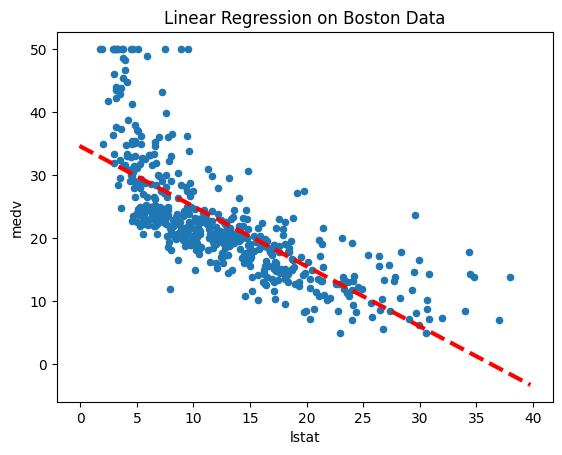

In [22]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth = 3)
ax.set_title('Linear Regression on Boston Data')

Now we can examine some diagnostic plots using the attributes of `results` returned on the linear regression fit. We begin by checking on the residuals.

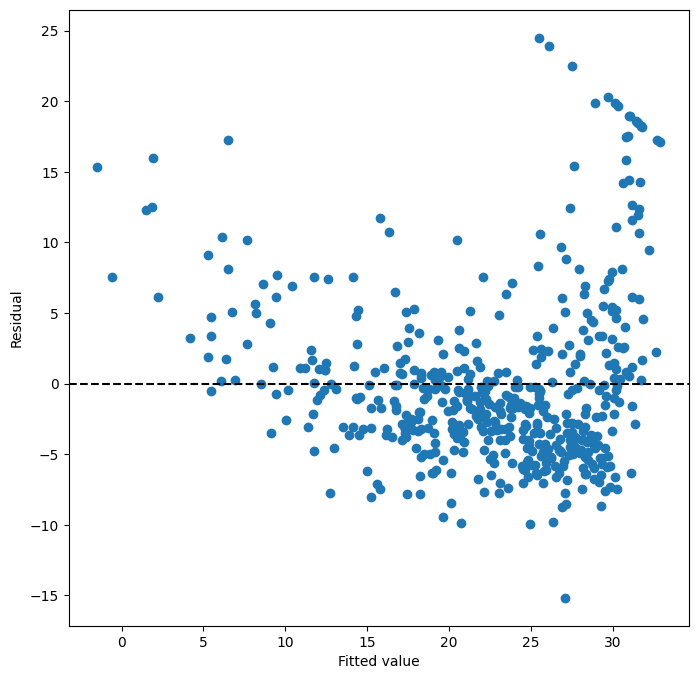

In [24]:
ax = subplots(figsize = (8,8))[1] # we will only use the ax returned by subplots (bot the fig)
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c = 'k', ls = '--'); # function to add a horizontal line at y = 0

This plot shows evidence of non-linearity between the predictor and the response used.

We can also check the influence and leverage of each observation by using the `hat_matrix_diag` of the `get_influence()` method os the regression fit object.

np.int64(374)

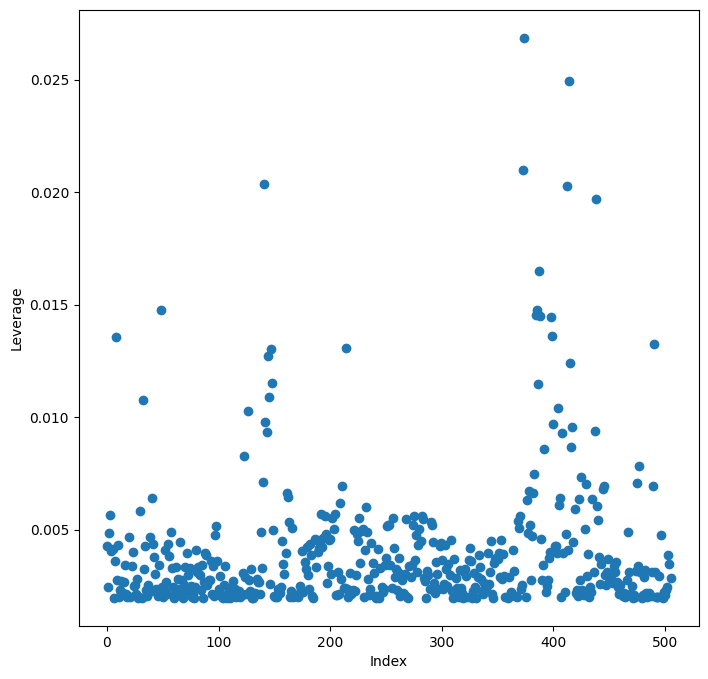

In [26]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # get the index of the observation with greatest leverage